### 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

Using TensorFlow backend.


### 2. Reading and preprocessing brain data signal from text file and storing them in numpy array 

In [2]:
f = open('robotics_lab.txt', 'r+')
my_file_data = f.read()
f.close()
data_temp_left=my_file_data.split(']')[0][7:]
left = data_temp_left.split('\n')[:3750]
data_left = np.loadtxt(left, delimiter='\t')
data_left = np.transpose(data_left)
data_temp_right=my_file_data.split(']')[1][13:]
right = data_temp_right.split('\n')[:3750]
data_right = np.loadtxt(right, delimiter='\t')
data_right = np.transpose(data_right)

### 3. Visualizing EEG signal from left and right lobes

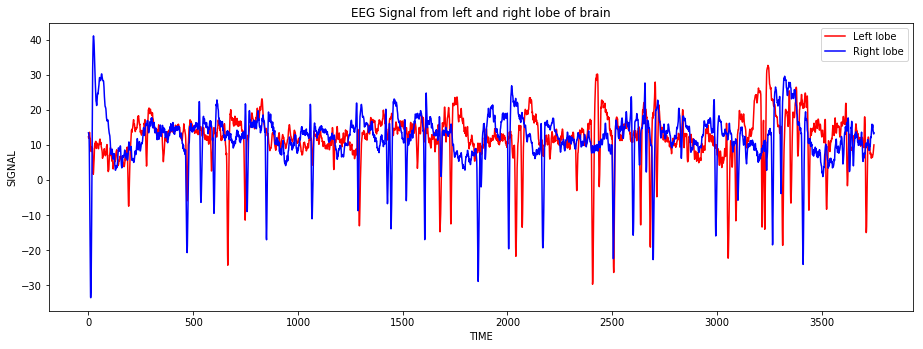

In [3]:
left_mean = np.mean(data_left,axis =0)
right_mean = np.mean(data_right,axis =0)
np.shape(data_right) 
time = np.array(range(0,3750))
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("EEG Signal from left and right lobe of brain")
ax.plot(time,left_mean,'r',label = "Left lobe")
ax.plot(time,right_mean,'b',label = "Right lobe")
ax.set_xlabel('TIME')
ax.set_ylabel('SIGNAL')
ax.legend(loc='best')
plt.show()

### 4. Increasing number of training examples to 9216 by introducing noise into data

In [4]:
left_std = np.std(data_left,axis=0)
right_std = np.std(data_right,axis=0)
for i in range(0,8):
    data_left = np.vstack((data_left,data_left))
    data_right = np.vstack((data_right,data_right))
noise_left = np.random.uniform(-1*left_std,left_std,size = (4608,3750))
noise_right = np.random.uniform(-1*right_std,right_std,size = (4608,3750))
w = 0.2
data_left_noise = w*data_left+noise_left
data_right_noise = w*data_right+noise_right
X = np.vstack((data_left_noise,data_right_noise))
y = np.zeros((9216,1))
y[:4608,:] = 1
temp_arr = np.hstack((X,y))
np.random.shuffle(temp_arr)

### 4. Setting X as training data while y as target variable

In [5]:
X = temp_arr[:,:3750]
y = temp_arr[:,3750]

### 5. Setting aside 30% of data for testing and 70% for training

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

### 6. Traning neural network 

In [7]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer ='uniform' , activation = 'relu', input_dim =3750))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(units = 6, kernel_initializer ='uniform' , activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(units = 1, kernel_initializer ='uniform' , activation = 'sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
6451/6451 [==============================] - 1s 101us/step - loss: 0.5437 - acc: 0.7154
Epoch 2/100
6451/6451 [==============================] - 0s 69us/step - loss: 0.3150 - acc: 0.8867
Epoch 3/100
6451/6451 [==============================] - 0s 77us/step - loss: 0.2694 - acc: 0.9036
Epoch 4/100
6451/6451 [==============================] - 0s 74us/step - loss: 0.2440 - acc: 0.9163
Epoch 5/100
6451/6451 [==============================] - 1s 92us/step - loss: 0.2213 - acc: 0.9211
Epoch 6/100
6451/6451 [==============================] - 0s 68us/step - loss: 0.2021 - acc: 0.9298
Epoch 7/100
6451/6451 [==============================] - 0s 67us/step - loss: 0.1938 - acc: 0.9324
Epoch 8/100
6451/6451 [==============================] - 0s 69us/step - loss: 0.1821 - acc: 0.9364
Epoch 9/100
6451/6451 [==============================] - 0s 59us/step - loss: 0.1770 - acc: 0.9380
Epoch 10/100
6451/6451 [==============================] - 0s 57us/step - loss: 0.1715 - acc: 0.9385
Epoch 11

6451/6451 [==============================] - 0s 55us/step - loss: 0.0930 - acc: 0.9682
Epoch 84/100
6451/6451 [==============================] - 0s 55us/step - loss: 0.0948 - acc: 0.9702
Epoch 85/100
6451/6451 [==============================] - 0s 55us/step - loss: 0.0940 - acc: 0.9690
Epoch 86/100
6451/6451 [==============================] - 0s 56us/step - loss: 0.0914 - acc: 0.9696
Epoch 87/100
6451/6451 [==============================] - 0s 55us/step - loss: 0.0915 - acc: 0.9690
Epoch 88/100
6451/6451 [==============================] - 0s 57us/step - loss: 0.0919 - acc: 0.9684
Epoch 89/100
6451/6451 [==============================] - 0s 58us/step - loss: 0.0958 - acc: 0.9678
Epoch 90/100
6451/6451 [==============================] - 0s 54us/step - loss: 0.0926 - acc: 0.9684
Epoch 91/100
6451/6451 [==============================] - 0s 56us/step - loss: 0.0883 - acc: 0.9709
Epoch 92/100
6451/6451 [==============================] - 0s 56us/step - loss: 0.0893 - acc: 0.9707
Epoch 93/100


### 7. Printing training accuracy

In [8]:
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train>0.5)
y_train = np.reshape(y_train,(6451,1))
train_accuracy = np.sum(np.sum((y_pred_train==y_train)))/np.size(y_pred_train)
print(train_accuracy)

0.999379941094404


### 8. Printing testing accuracy

In [9]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test>0.5)
y_test = np.reshape(y_test,(2765,1))
test_accuracy = np.sum(np.sum((y_pred_test==y_test)))/np.size(y_pred_test)
print(test_accuracy)

0.9432188065099457
